In [1]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d nanditapore/healthcare-diabetes

In [ ]:
!unzip healthcare-diabetes.zip -d healthcare-diabetes

In [ ]:
import pandas as pd

df = pd.read_csv(" ")
df.head()

# **Experiment 1**

In [3]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load dataset (replace path with your CSV file)
df = pd.read_csv('Healthcare-Diabetes.csv')
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


Data Cleaning

In [4]:
print(df.isnull().sum())

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 with NaN for proper imputation
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# Impute missing values with median
imputer = SimpleImputer(strategy='median')
df[cols_with_zeros] = imputer.fit_transform(df[cols_with_zeros])

Data Integration

In [6]:
# df2 = pd.read_csv('another_dataset.csv')
# df = pd.merge(df, df2, on='Id', how='outer')

Data Transformation

In [7]:
scaler = StandardScaler()  # Standardization (mean=0, std=1)
num_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[num_cols] = scaler.fit_transform(df[num_cols])


In [8]:
print(df.head())
print(df.isnull().sum())
print(df.describe())

   Id  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
0   1     0.679232  0.856993      -0.032190       0.641606 -0.177015   
1   2    -0.825341 -1.208717      -0.532758      -0.022803 -0.177015   
2   3     1.281062  2.004610      -0.699614      -0.022803 -0.177015   
3   4    -0.825341 -1.077561      -0.532758      -0.687212 -0.563148   
4   5    -1.126256  0.496313      -2.701886       0.641606  0.329784   

        BMI  DiabetesPedigreeFunction       Age  Outcome  
0  0.141662                  0.478509  1.432495        1  
1 -0.843952                 -0.369130 -0.181079        0  
2 -1.308598                  0.616712 -0.096154        1  
3 -0.632749                 -0.934224 -1.030329        0  
4  1.479279                  5.579704 -0.011229        1  
Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
Dia

# **Experiment 2**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Healthcare-Diabetes.csv')
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# Summary statistics
print(df.describe())

# Check distribution of Outcome
print(df['Outcome'].value_counts())

                Id  Pregnancies      Glucose  BloodPressure  SkinThickness  \
count  2768.000000  2768.000000  2768.000000    2768.000000    2768.000000   
mean   1384.500000     3.742775   121.102601      69.134393      20.824422   
std     799.197097     3.323801    32.036508      19.231438      16.059596   
min       1.000000     0.000000     0.000000       0.000000       0.000000   
25%     692.750000     1.000000    99.000000      62.000000       0.000000   
50%    1384.500000     3.000000   117.000000      72.000000      23.000000   
75%    2076.250000     6.000000   141.000000      80.000000      32.000000   
max    2768.000000    17.000000   199.000000     122.000000     110.000000   

           Insulin          BMI  DiabetesPedigreeFunction          Age  \
count  2768.000000  2768.000000               2768.000000  2768.000000   
mean     80.127890    32.137392                  0.471193    33.132225   
std     112.301933     8.076127                  0.325669    11.777230   
m

In [11]:
# Correlation matrix
corr = df.corr()

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of EHR Features")]

plt.show()

SyntaxError: unmatched ']' (1746902155.py, line 7)

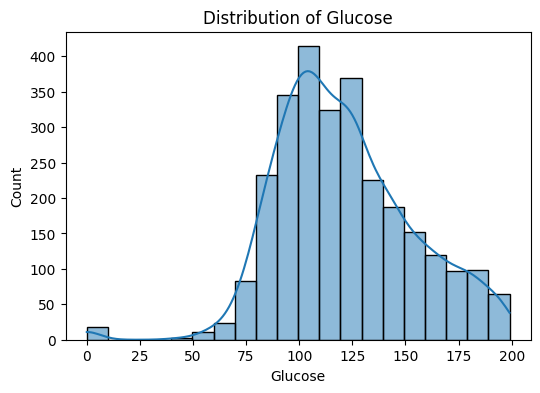

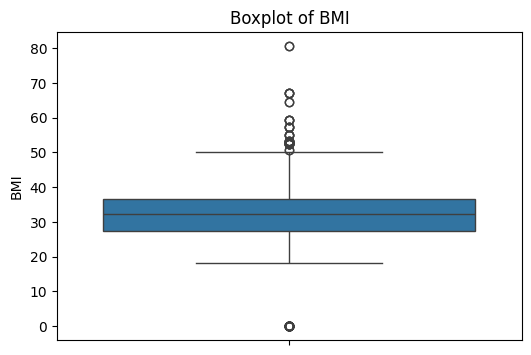

In [12]:
# Histogram for Glucose
plt.figure(figsize=(6,4))
sns.histplot(df['Glucose'], bins=20, kde=True)
plt.title("Distribution of Glucose")
plt.show()

# Boxplot for BMI
plt.figure(figsize=(6,4))
sns.boxplot(y=df['BMI'])
plt.title("Boxplot of BMI")
plt.show()

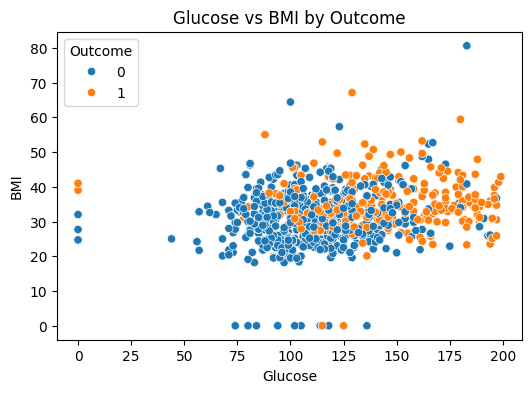

In [13]:
# Scatter plot: Glucose vs BMI colored by Outcome
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Outcome')
plt.title("Glucose vs BMI by Outcome")
plt.show()

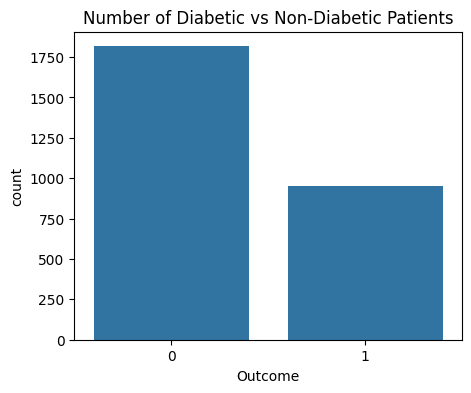

In [14]:
# Count plot
plt.figure(figsize=(5,4))
sns.countplot(x='Outcome', data=df)
plt.title("Number of Diabetic vs Non-Diabetic Patients")
plt.show()

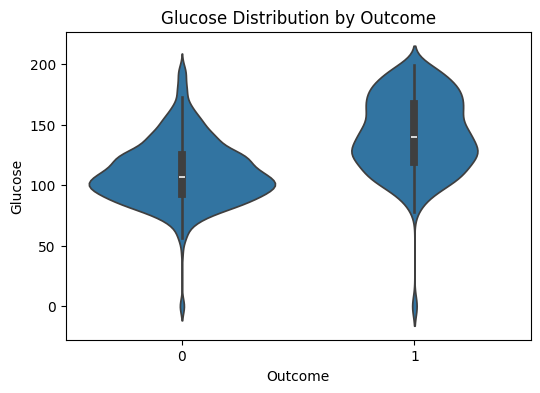

In [15]:
# Violin plot for Glucose by Outcome
plt.figure(figsize=(6,4))
sns.violinplot(x='Outcome', y='Glucose', data=df)
plt.title("Glucose Distribution by Outcome")
plt.show()

# **Experiment 3**

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip chest-xray-pneumonia.zip -d chest_xray_pneumonia

In [ ]:
img_path = '/content/chest_xray_pneumonia/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Original X-Ray Image")
plt.axis('off')
plt.show()


In [ ]:
# Resize
img_resized = cv2.resize(img, (224, 224))

# Normalize pixel values (0–1 range)
img_normalized = img_resized / 255.0

plt.imshow(img_normalized)
plt.title("Resized and Normalized Image")
plt.axis('off')
plt.show()


In [ ]:
# Gaussian Blur
blurred = cv2.GaussianBlur(img_resized, (5,5), 0)

# Median Filter
median = cv2.medianBlur(img_resized, 5)

# Display comparison
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].imshow(blurred); axes[0].set_title("Gaussian Blur"); axes[0].axis('off')
axes[1].imshow(median); axes[1].set_title("Median Filter"); axes[1].axis('off')
plt.show()


In [ ]:
gray = cv2.cvtColor(img_resized, cv2.COLOR_RGB2GRAY)
equalized = cv2.equalizeHist(gray)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(gray, cmap='gray'); plt.title("Original Grayscale")
plt.subplot(1,2,2); plt.imshow(equalized, cmap='gray'); plt.title("Histogram Equalized")
plt.show()


In [ ]:
edges = cv2.Canny(equalized, 100, 200)

plt.imshow(edges, cmap='gray')
plt.title("Edge Detection (Canny)")
plt.axis('off')
plt.show()


# **Experiment 4**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Load sample image
img_path = '/content/chest_xray_pneumonia/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Resize for consistency
gray = cv2.resize(gray, (256, 256))

plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale X-Ray")
plt.axis('off')
plt.show()


In [ ]:
# Adaptive thresholding
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2)

plt.imshow(thresh, cmap='gray')
plt.title("Segmented Image (Thresholding)")
plt.axis('off')
plt.show()


In [ ]:
# Morphological closing and opening
kernel = np.ones((5,5), np.uint8)
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)

plt.imshow(morph, cmap='gray')
plt.title("After Morphological Operations")
plt.axis('off')
plt.show()

In [ ]:
# Find contours
contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
segmented = cv2.drawContours(img.copy(), contours, -1, (255,0,0), 2)

plt.imshow(segmented)
plt.title("Detected Lung Contours")
plt.axis('off')
plt.show()

# Count regions
print(f"Detected Segmented Regions: {len(contours)}")

In [ ]:
total_pixels = morph.size
infected_pixels = np.sum(morph == 255)

infection_percentage = (infected_pixels / total_pixels) * 100
print(f"Infection Area: {infection_percentage:.2f}% of the image")

# **Experiment 5**

In [ ]:
!pip install scispacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.2/en_core_sci_sm-0.5.2.tar.gz

In [ ]:
# ==========================================
# Named Entity Recognition (NER) for Clinical Text
# ==========================================

# Step 1: Install required libraries (run these only once)
# !pip install spacy scispacy
# !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_ner_bc5cdr_md-0.5.1.tar.gz

import spacy

# -----------------------------------------
# Step 2: Load Biomedical NER Model
# -----------------------------------------
# This model recognizes diseases and chemicals (clinical entities)
nlp = spacy.load("en_ner_bc5cdr_md")

# -----------------------------------------
# Step 3: Example Clinical Text
# -----------------------------------------
clinical_text = """
The patient was diagnosed with diabetes mellitus and hypertension.
Metformin was prescribed to control blood sugar levels.
He also complained of chest pain and shortness of breath, indicating possible coronary artery disease.
"""

# Process the text
doc = nlp(clinical_text)

# -----------------------------------------
# Step 4: Extract Named Entities
# -----------------------------------------
print("=== Clinical Entities Detected ===\n")
for ent in doc.ents:
    print(f"Entity: {ent.text:<30} | Label: {ent.label_}")

# -----------------------------------------
# Step 5: Visualize Entities (Optional in Jupyter/Colab)
# -----------------------------------------
from spacy import displacy
displacy.render(doc, style="ent", jupyter=True)





# **Experiment 6**

In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

In [ ]:
clinical_notes = [
    "The patient has shown remarkable improvement after the new medication.",
    "Patient still complains of severe chest pain and breathing difficulty.",
    "The condition is stable with no significant changes.",
    "Symptoms have worsened overnight despite ongoing treatment.",
    "Patient is feeling better and reports normal activity levels."
]

In [ ]:
analyzer = SentimentIntensityAnalyzer()

for note in clinical_notes:
    sentiment = analyzer.polarity_scores(note)
    print(f"Note: {note}")
    print(f"Sentiment Scores: {sentiment}\n")


In [ ]:
def get_sentiment_label(compound):
    if compound >= 0.05:
        return "Positive"
    elif compound <= -0.05:
        return "Negative"
    else:
        return "Neutral"

for note in clinical_notes:
    sentiment = analyzer.polarity_scores(note)
    label = get_sentiment_label(sentiment['compound'])
    print(f"Note: {note}\n→ Sentiment: {label}\n")



In [ ]:
import matplotlib.pyplot as plt

scores = [analyzer.polarity_scores(n)['compound'] for n in clinical_notes]
labels = [get_sentiment_label(s) for s in scores]

plt.bar(range(len(clinical_notes)), scores, color=['g' if s > 0 else 'r' if s < 0 else 'gray' for s in scores])
plt.xticks(range(len(clinical_notes)), labels)
plt.title("Sentiment Scores of Clinical Notes")
plt.ylabel("Compound Score (-1 to +1)")
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv("/content/Healthcare-Diabetes.csv")

df.head()

# **Experiment 7**

In [ ]:
# Risk Factor Analysis Using Machine Learning
# Dataset Columns:
# Id, Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome

# --- Step 1: Import Required Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Step 2: Load Dataset ---
# Replace 'patient_data.csv' with your actual dataset filename
df = pd.read_csv("/content/Healthcare-Diabetes.csv")
print("✅ Dataset Loaded Successfully")
print(df.head())

# --- Step 3: Data Cleaning ---
# Replace zero values with NaN for certain columns and fill with mean
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_fix:
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].mean(), inplace=True)

print("\n✅ Missing Values Handled Successfully")
print(df.isnull().sum())

# --- Step 4: Define Features and Target ---
X = df.drop(['Id', 'Outcome'], axis=1)
y = df['Outcome']

# --- Step 5: Feature Scaling ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 6: Split Data into Train and Test Sets ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Step 7: Logistic Regression Model ---
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# --- Step 8: Random Forest Model ---
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# --- Step 9: Evaluate Models ---
print("\n--- Logistic Regression Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("\n--- Random Forest Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# --- Step 10: Risk Factor (Feature Importance) Analysis ---
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n--- Risk Factor Importance (Random Forest) ---")
print(feature_importance)

# --- Step 11: Visualization of Risk Factors ---
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Risk Factor Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Health Feature')
plt.show()

# --- Step 12: Correlation Heatmap (Additional Insight) ---
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Health Parameters")
plt.show()





# **Experiment 8**

In [ ]:
# Diagnose Disease Risk from Patient Data
# Dataset Columns:
# Id, Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome

# --- Step 1: Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Step 2: Load Dataset ---
# Replace 'patient_data.csv' with your dataset filename
df = pd.read_csv("Healthcare-Diabetes.csv")
print("✅ Dataset Loaded Successfully")
print(df.head())

# --- Step 3: Data Cleaning ---
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_fix:
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].mean(), inplace=True)

print("\n✅ Missing Values Handled Successfully")
print(df.isnull().sum())

# --- Step 4: Feature and Target Selection ---
X = df.drop(['Id', 'Outcome'], axis=1)
y = df['Outcome']

# --- Step 5: Data Scaling ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 6: Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Step 7: Model Training ---
# (a) Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# (b) Support Vector Machine (SVM)
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# --- Step 8: Evaluation ---

print("\n--- Decision Tree Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

print("\n--- SVM Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# --- Step 9: Confusion Matrices ---
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', ax=axes[0], cmap='Greens')
axes[0].set_title("Decision Tree Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title("SVM Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# --- Step 10: Visualize Decision Tree ---
plt.figure(figsize=(12, 6))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree for Disease Diagnosis")
plt.show()

# --- Step 11: Predict on New Patient Data (Example) ---
# Example patient values (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age)
new_patient = np.array([[2, 150, 80, 25, 100, 30.5, 0.45, 35]])
new_patient_scaled = scaler.transform(new_patient)
prediction = svm.predict(new_patient_scaled)
print("\nNew Patient Prediction (SVM):", "Disease" if prediction[0] == 1 else "No Disease")


✅ Dataset Loaded Successfully
   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6
1   2            1       85             66             29        0  26.6
2   3            8      183             64              0        0  23.3
3   4            1       89             66             23       94  28.1
4   5            0      137             40             35      168  43.1

   DiabetesPedigreeFunction  Age  Outcome
0                     0.627   50        1
1                     0.351   31        0
2                     0.672   32        1
3                     0.167   21        0
4                     2.288   33        1

✅ Missing Values Handled Successfully
Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
/tmp/ipython-input-4016701714.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)

--- Decision Tree Results ---
Accuracy: 0.776173285198556
              precision    recall  f1-score   support

           0       0.85      0.80      0.83       367
           1       0.65      0.73      0.69       187

    accuracy                           0.78       554
   macro avg       0.75      0.77      0.76       554
weighted avg       0.79      0.78      0.78       554


--- SVM Results ---
Accuracy: 0.8375451263537906
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       367
           1       0.82      0.66      0.73       187

    accuracy                           0.84       554
   macro avg       0.83      0.79      0.81       554
weighted avg       0.84      0.84      0.83       554


# **Experiment 9**

In [ ]:
# Disease Risk Diagnosis Using Reinforcement Learning for Sequential Decision Making
# Conceptual Example using Q-Learning

import numpy as np
import random

n_states = 5
n_actions = 4

# Initialize Q-table
Q = np.zeros((n_states, n_actions))

# Define rewards matrix (simplified for concept)
R = np.array([
    [0, -1, +10, -10],  # Healthy patient
    [0, -2, -5, +2],    # Mild symptoms
    [0, -2, -8, +5],    # Moderate
    [0, -3, -10, +8],   # Severe
    [0, -3, -10, +10]   # Critical
])

# --- Step 2: Define Parameters ---
alpha = 0.1     # Learning rate
gamma = 0.9     # Discount factor
epsilon = 0.2   # Exploration rate
episodes = 1000

# --- Step 3: Training Loop ---
for episode in range(episodes):
    state = random.randint(0, n_states - 1)
    done = False

    while not done:
        # Choose action (ε-greedy)
        if random.uniform(0, 1) < epsilon:
            action = random.randint(0, n_actions - 1)
        else:
            action = np.argmax(Q[state, :])

        # Get reward for current (state, action)
        reward = R[state, action]

        # Simulate next state (simplified)
        next_state = random.randint(0, n_states - 1)

        # Update Q-value (Bellman Equation)
        Q[state, action] = Q[state, action] + alpha * (
            reward + gamma * np.max(Q[next_state, :]) - Q[state, action]
        )

        # End episode if terminal decision (diagnosis made)
        if action in [2, 3]:
            done = True
        else:
            state = next_state

# --- Step 4: Display Learned Q-Table ---
print("\n--- Learned Q-Table ---")
print(pd.DataFrame(Q, columns=["Do Nothing", "Recommend Test", "Diagnose Healthy", "Diagnose Diseased"]))

# --- Step 5: Derive Optimal Policy ---
optimal_policy = np.argmax(Q, axis=1)
actions = ["Do Nothing", "Recommend Test", "Diagnose Healthy", "Diagnose Diseased"]

print("\n--- Optimal Diagnostic Policy ---")
for state in range(n_states):
    print(f"Patient State {state}: {actions[optimal_policy[state]]}")

# --- Step 6: Simulate Diagnosis ---
def diagnose_patient(symptom_level):
    action = optimal_policy[symptom_level]
    print(f"\nFor patient with symptom level {symptom_level}, system decides to: {actions[action]}")

# Example simulation
diagnose_patient(0)  # Healthy
diagnose_patient(2)  # Moderate
diagnose_patient(4)  # Critical



# **Experiment 10**

In [ ]:
# ===============================
# Social Media Analytics for Outbreak Prediction
# ===============================

import pandas as pd
import numpy as np
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# ---------------------------------
# Step 1: Simulate Social Media Data
# ---------------------------------
data = {
    'post': [
        "High fever and cough spreading in my area!",
        "So many people sick lately, hospitals are full.",
        "Feeling great today, no symptoms here.",
        "Severe cold and body ache since last week.",
        "No news of any infection in our town.",
        "Flu cases rising rapidly across the city!",
        "Just mild headache, nothing serious.",
        "Doctors report increase in respiratory illness.",
        "No sign of infection here, all safe!",
        "Many friends tested positive for flu recently."
    ],
    'location': ['Mumbai','Delhi','Pune','Chennai','Goa','Delhi','Pune','Bangalore','Goa','Mumbai']
}

df = pd.DataFrame(data)
print("Sample Social Media Posts:")
print(df.head())

# ---------------------------------
# Step 2: Text Preprocessing
# ---------------------------------
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

df['clean_post'] = df['post'].apply(clean_text)

# ---------------------------------
# Step 3: Sentiment Analysis
# ---------------------------------
df['sentiment'] = df['clean_post'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['risk_label'] = df['sentiment'].apply(lambda x: 1 if x < -0.1 else 0)  # Negative sentiment → outbreak signal

print("\nSentiment & Risk Labels:")
print(df[['post','sentiment','risk_label']])

# ---------------------------------
# Step 4: Visualize Sentiment by Location
# ---------------------------------
plt.figure(figsize=(8,4))
df.groupby('location')['risk_label'].mean().plot(kind='bar', color='orange')
plt.title('Outbreak Risk Level by Location')
plt.ylabel('Average Risk Signal (0=Low, 1=High)')
plt.show()

# ---------------------------------
# Step 5: Predictive Modeling
# ---------------------------------
# Convert text to numerical features (very simple TF-IDF like simulation)
df['keyword_score'] = df['clean_post'].apply(
    lambda x: sum([1 for w in ['fever','cough','flu','infection','sick','ill','hospital'] if w in x])
)

X = df[['sentiment','keyword_score']]
y = df['risk_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nModel Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ---------------------------------
# Step 6: Outbreak Prediction Summary
# ---------------------------------
outbreak_risk = df.groupby('location')['risk_label'].mean().reset_index()
print("\nPredicted Outbreak Risk by Location:")
print(outbreak_risk)


# **Experiment 11**

In [ ]:
# ===========================================
# Social Media Analytics for Drug Review Analytics
# ===========================================

import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# -------------------------------
# Step 1: Simulate Drug Review Data
# -------------------------------
data = {
    'review': [
        "This medicine worked great for my headache, quick relief!",
        "Terrible side effects, I felt dizzy and nauseous.",
        "It helped reduce my fever in just one day.",
        "Did not work at all, complete waste of money.",
        "Mild improvement, but caused stomach pain.",
        "Highly effective for pain relief, totally recommend it!",
        "Too expensive for such little effect.",
        "Very satisfied with the results, no side effects.",
        "I had allergic reactions after taking this pill.",
        "Works okay, but takes too long to show effect."
    ],
    'drug_name': [
        "PainAway","PainAway","FeverGo","FeverGo","CurePlus",
        "PainAway","CurePlus","FeverGo","CurePlus","PainAway"
    ]
}

df = pd.DataFrame(data)
print("Sample Drug Reviews:")
print(df.head())

# -------------------------------
# Step 2: Text Cleaning
# -------------------------------
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower()

df['clean_review'] = df['review'].apply(clean_text)

# -------------------------------
# Step 3: Sentiment Analysis
# -------------------------------
df['sentiment'] = df['clean_review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['label'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

print("\nSentiment Results:")
print(df[['review','sentiment','label']])

# -------------------------------
# Step 4: Visualize Sentiment Distribution
# -------------------------------
plt.figure(figsize=(5,4))
df['label'].value_counts().plot(kind='bar', color=['green','red'])
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# -------------------------------
# Step 5: Word Cloud for Positive vs Negative Reviews
# -------------------------------
positive_text = " ".join(df[df['label']=='Positive']['clean_review'])
negative_text = " ".join(df[df['label']=='Negative']['clean_review'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=500,height=300,background_color='white').generate(positive_text))
plt.title("Positive Reviews Word Cloud")

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=500,height=300,background_color='white').generate(negative_text))
plt.title("Negative Reviews Word Cloud")
plt.show()

# -------------------------------
# Step 6: Simple Predictive Model
# -------------------------------
# Simulate keyword-based features (basic numeric encoding)
df['keyword_score'] = df['clean_review'].apply(
    lambda x: sum([1 for w in ['good','great','effective','recommend','relief'] if w in x]) -
                sum([1 for w in ['bad','terrible','waste','pain','dizzy','allergic'] if w in x])
)

X = df[['sentiment','keyword_score']]
y = df['label'].map({'Positive':1, 'Negative':0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Negative','Positive']))

# -------------------------------
# Step 7: Drug-wise Sentiment Summary
# -------------------------------
drug_summary = df.groupby('drug_name')['sentiment'].mean().reset_index()
drug_summary.columns = ['Drug','Average Sentiment']
print("\nAverage Sentiment by Drug:")
print(drug_summary)

plt.figure(figsize=(6,4))
plt.bar(drug_summary['Drug'], drug_summary['Average Sentiment'], color='skyblue')
plt.title('Average Sentiment Score by Drug')
plt.ylabel('Sentiment Score')
plt.show()




# **Experiment 12**

Sample Healthcare Data:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      120             70             25       85  28.1   
1            5      150             80             32      130  33.6   
2            1       80             65             20       70  22.5   
3            0       90             75             22       90  25.2   
4            3      140             78             28      115  31.4   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.45   25        0  
1                      0.62   45        1  
2                      0.28   21        0  
3                      0.33   32        0  
4                      0.55   38        1  


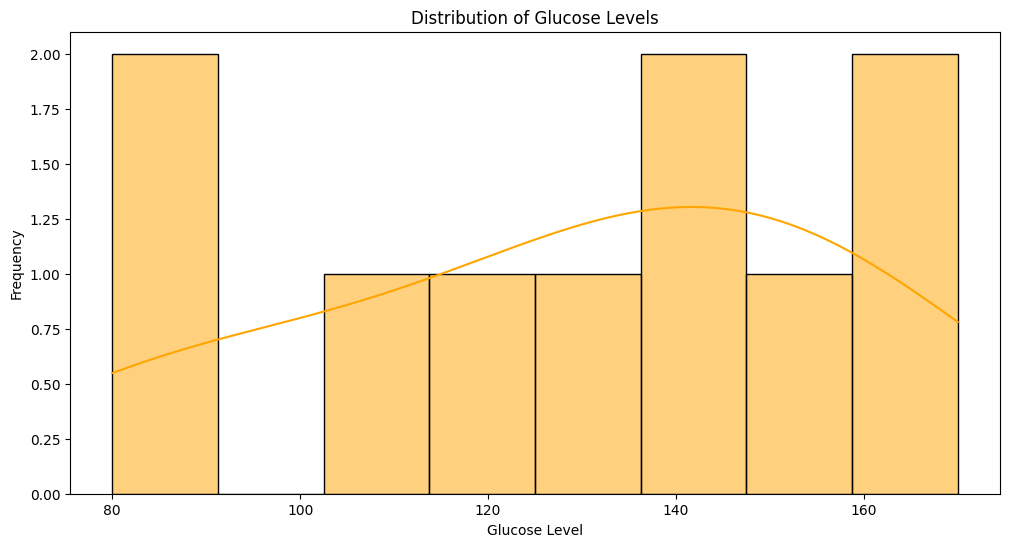

C:\Users\kshit\AppData\Local\Temp\ipykernel_10096\1651144798.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='BMI', data=df, palette='Set2')


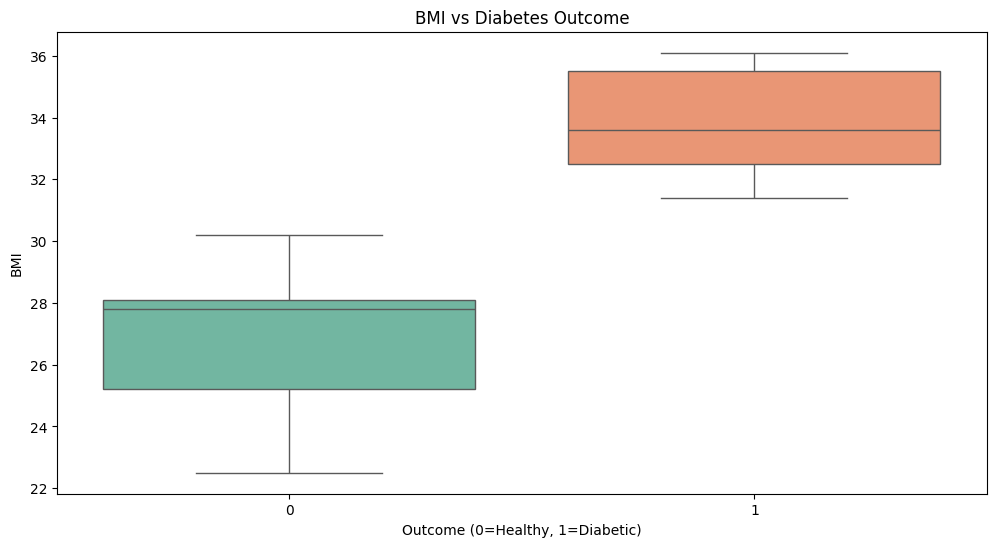

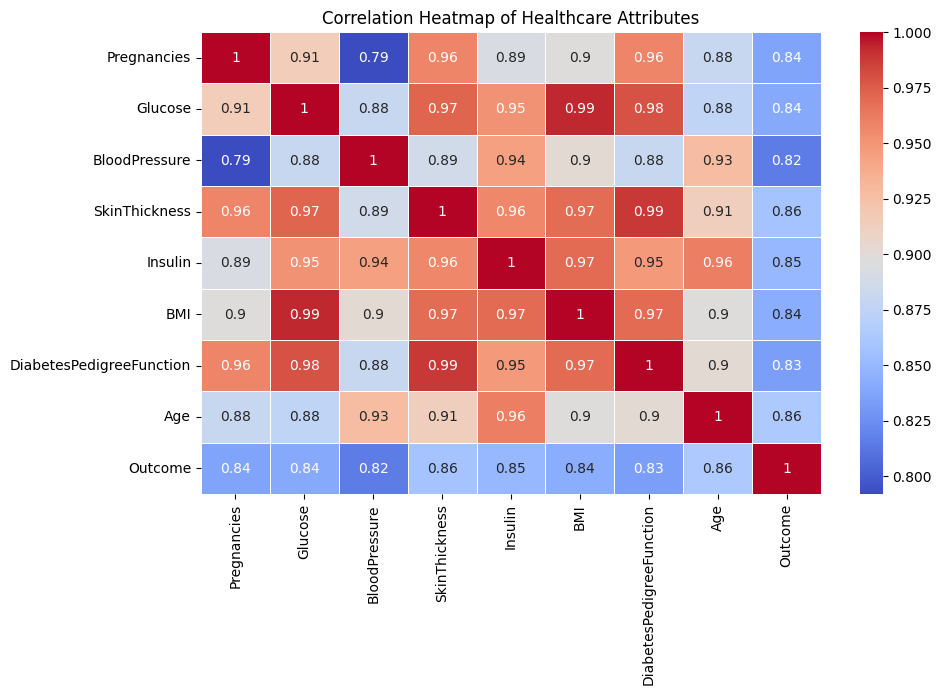

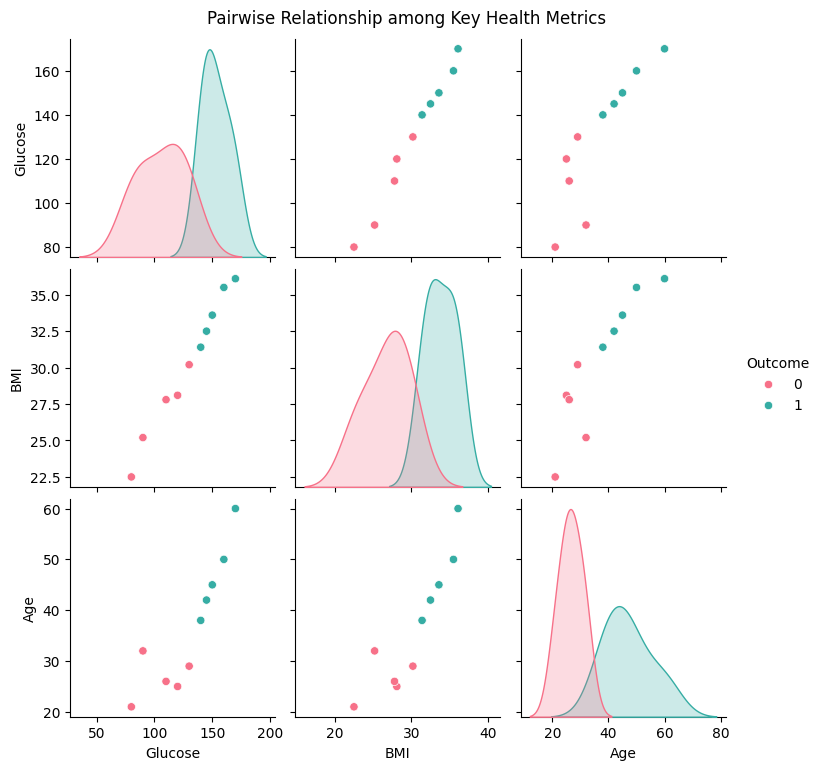

C:\Users\kshit\AppData\Local\Temp\ipykernel_10096\1651144798.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outcome', y='Age', data=df, palette='viridis', estimator='mean')


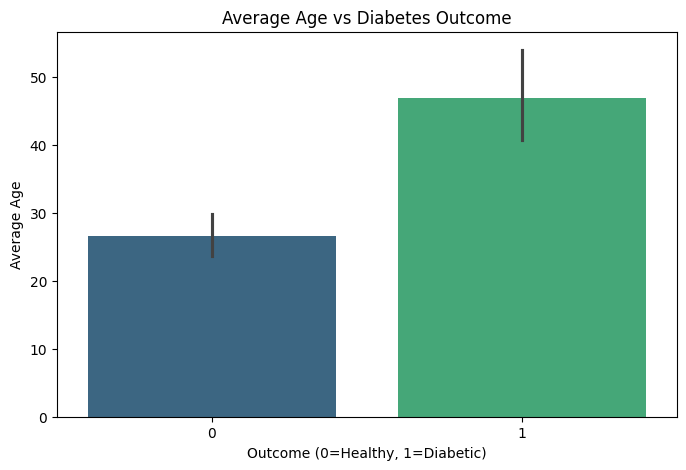

In [2]:
# ============================================
# Visual Analytics for Healthcare Data
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# Step 1: Load Dataset
# ------------------------------
# Example dataset (replace with your CSV file if available)
data = {
    'Pregnancies': [2, 5, 1, 0, 3, 4, 6, 2, 1, 3],
    'Glucose': [120, 150, 80, 90, 140, 160, 170, 130, 110, 145],
    'BloodPressure': [70, 80, 65, 75, 78, 82, 85, 77, 68, 80],
    'SkinThickness': [25, 32, 20, 22, 28, 30, 34, 26, 24, 29],
    'Insulin': [85, 130, 70, 90, 115, 140, 155, 110, 95, 125],
    'BMI': [28.1, 33.6, 22.5, 25.2, 31.4, 35.5, 36.1, 30.2, 27.8, 32.5],
    'DiabetesPedigreeFunction': [0.45, 0.62, 0.28, 0.33, 0.55, 0.60, 0.72, 0.48, 0.39, 0.52],
    'Age': [25, 45, 21, 32, 38, 50, 60, 29, 26, 42],
    'Outcome': [0, 1, 0, 0, 1, 1, 1, 0, 0, 1]
}

df = pd.DataFrame(data)
print("Sample Healthcare Data:")
print(df.head())

# ------------------------------
# Step 2: Distribution Analysis
# ------------------------------
plt.figure(figsize=(12,6))
sns.histplot(df['Glucose'], kde=True, color='orange', bins=8)
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='Outcome', y='BMI', data=df, palette='Set2')
plt.title('BMI vs Diabetes Outcome')
plt.xlabel('Outcome (0=Healthy, 1=Diabetic)')
plt.ylabel('BMI')
plt.show()

# ------------------------------
# Step 3: Correlation Heatmap
# ------------------------------
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Healthcare Attributes')
plt.show()

# ------------------------------
# Step 4: Pair Plot Visualization
# ------------------------------
sns.pairplot(df[['Glucose','BMI','Age','Outcome']], hue='Outcome', palette='husl')
plt.suptitle('Pairwise Relationship among Key Health Metrics', y=1.02)
plt.show()

# ------------------------------
# Step 5: Outcome-Based Insights
# ------------------------------
plt.figure(figsize=(8,5))
sns.barplot(x='Outcome', y='Age', data=df, palette='viridis', estimator='mean')
plt.title('Average Age vs Diabetes Outcome')
plt.xlabel('Outcome (0=Healthy, 1=Diabetic)')
plt.ylabel('Average Age')
plt.show()
